In [1]:
#1 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

import FinanceDataReader as fdr

# debug
import pdb
#pdb.set_trace()

import seaborn as sns

# 시각화 사용자 설정
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
#2 DF 만들기 (종가, 공통지수들)
#공통지수
def makeCommonData(startDate) :
    
    # 공통지수
    # 한국
    # KOSPI 지수
    KS11 = fdr.DataReader('KS11', start=startDate)
    # KOSDAQ 지수
    KQ11 = fdr.DataReader('KQ11', start=startDate)
    # KOSPI 50 지수
    KS50 = fdr.DataReader('KS50', start=startDate)
    # KOSPI 100
    KS100 = fdr.DataReader('KS100', start=startDate)
    # KRX 100
    KRX100 = fdr.DataReader('KRX100', start=startDate)
    # 코스피 200
    KS200 = fdr.DataReader('KS200', start=startDate)
    
    # 미국
    # 다우존스 지수
    DJI = fdr.DataReader('DJI', start=startDate)
    # 나스닥 지수
    IXIC = fdr.DataReader('IXIC', start=startDate)
    # S&P 500 지수
    US500 = fdr.DataReader('US500', start=startDate)
    # S&P 500 VIX
    VIX = fdr.DataReader('VIX', start=startDate)
    
    # 국가별 주요 지수
    # 닛케이 225 선물
    JP225 = fdr.DataReader('JP225', start=startDate)
    # Euro Stoxx 50
    STOXX50 = fdr.DataReader('STOXX50', start=startDate)
    # CSI 300 (중국)
    CSI300 = fdr.DataReader('CSI300', start=startDate)
    # 항셍 (홍콩)
    HSI = fdr.DataReader('HSI', start=startDate)
    # 영국 FTSE
    FTSE = fdr.DataReader('FTSE', start=startDate)
    # 독일 DAX 30
    DAX = fdr.DataReader('DAX', start=startDate)
    # 프랑스 CAC 40
    CAC = fdr.DataReader('CAC', start=startDate)
    
    # 환율
    # 달러당 원화 환율
    USD_KRW = fdr.DataReader('USD/KRW', start=startDate)
    # 달러당 유로화 환율
    USD_EUR = fdr.DataReader('USD/EUR', start=startDate)
    # 달러당 엔화 환율
    USD_JPY = fdr.DataReader('USD/JPY', start=startDate)
    # 위엔화 원화 환율
    CNY_KRW = fdr.DataReader('CNY/KRW', start=startDate)
    # 유로화 달러 환율
    EUR_USD = fdr.DataReader('EUR/USD', start=startDate)
    # 엔화 원화 환율
    JPY_KRW = fdr.DataReader('JPY/KRW', start=startDate)
    # 오스트레일리아 달러 환율
    AUD_USD = fdr.DataReader('AUD/USD', start=startDate)
    # 유로화 엔화 환율
    EUR_JPY = fdr.DataReader('EUR/JPY', start=startDate)
    # 달러 루블화
    USD_RUB = fdr.DataReader('USD/RUB', start=startDate)
    
    # 코인 가격 - 2018년부터 있어서 일단 제외
    # 비트코인 달러 가격
    BTC = fdr.DataReader('BTC/USD', start=startDate)
    # 이더리움 달러 가격
    ETH = fdr.DataReader('ETH/USD', start=startDate)
    # 리플 달러 가격
    XRP = fdr.DataReader('XRP/USD', start=startDate)
    
    # 합치기
    KS11.rename(columns={'Close':'KS11_Close', 'Volume':'KS11_Volume'}, inplace=True)
    KQ11.rename(columns={'Close':'KQ11_Close', 'Volume':'KQ11_Volume'}, inplace=True)
    KS50.rename(columns={'Close':'KS50_Close', 'Volume':'KS50_Volume'}, inplace=True)
    KS100.rename(columns={'Close':'KS100_Close', 'Volume':'KS100_Volume'}, inplace=True)
    KRX100.rename(columns={'Close':'KRX100_Close', 'Volume':'KRX100_Volume'}, inplace=True)
    KS200.rename(columns={'Close':'KS200_Close', 'Volume':'KS200_Volume'}, inplace=True)
    
    DJI.rename(columns={'Close':'DJI_Close', 'Volume':'DJI_Volume'}, inplace=True)
    IXIC.rename(columns={'Close':'IXIC_Close', 'Volume':'IXIC_Volume'}, inplace=True)
    US500.rename(columns={'Close':'US500_Close', 'Volume':'US500_Volume'}, inplace=True)
    VIX.rename(columns={'Close':'VIX_Close', 'Volume':'VIX_Volume'}, inplace=True)
    
    JP225.rename(columns={'Close':'JP225_Close', 'Volume':'JP225_Volume'}, inplace=True)
    STOXX50.rename(columns={'Close':'STOXX50_Close', 'Volume':'STOXX50_Volume'}, inplace=True)
    CSI300.rename(columns={'Close':'CSI300_Close', 'Volume':'CSI300_Volume'}, inplace=True)
    HSI.rename(columns={'Close':'HSI_Close', 'Volume':'HSI_Volume'}, inplace=True)
    FTSE.rename(columns={'Close':'FTSE_Close', 'Volume':'FTSE_Volume'}, inplace=True)
    DAX.rename(columns={'Close':'DAX_Close', 'Volume':'DAX_Volume'}, inplace=True)
    CAC.rename(columns={'Close':'CAC_Close', 'Volume':'CAC_Volume'}, inplace=True)
    
    USD_KRW.rename(columns={'Close':'USD_KRW_Close'}, inplace=True)
    USD_EUR.rename(columns={'Close':'USD_EUR_Close'}, inplace=True)
    USD_JPY.rename(columns={'Close':'USD_JPY_Close'}, inplace=True)
    CNY_KRW.rename(columns={'Close':'CNY_KRW_Close'}, inplace=True)
    EUR_USD.rename(columns={'Close':'EUR_USD_Close'}, inplace=True)
    JPY_KRW.rename(columns={'Close':'JPY_KRW_Close'}, inplace=True)
    AUD_USD.rename(columns={'Close':'AUD_USD_Close'}, inplace=True)
    EUR_JPY.rename(columns={'Close':'EUR_JPY_Close'}, inplace=True)
    USD_RUB.rename(columns={'Close':'USD_RUB_Close'}, inplace=True)
    #BTC.rename(columns={'Close':'BTC_Close', 'Volume':'BTC_Volume'}, inplace=True)
    #ETH.rename(columns={'Close':'ETH_Close', 'Volume':'ETH_Volume'}, inplace=True)
    #XRP.rename(columns={'Close':'XRP_Close', 'Volume':'XRP_Volume'}, inplace=True)
    
    '''
    df = pd.concat([
                KS11[['KS11_Close', 'KS11_Volume']], KQ11[['KQ11_Close', 'KQ11_Volume']], 
                KS50[['KS50_Close', 'KS50_Volume']], KS100[['KS100_Close', 'KS100_Volume']],
                KRX100[['KRX100_Close', 'KRX100_Volume']], KS200[['KS200_Close', 'KS200_Volume']],
        
                DJI[['DJI_Close', 'DJI_Volume']], IXIC[['IXIC_Close', 'IXIC_Volume']],
                US500[['US500_Close', 'US500_Volume']], VIX[['VIX_Close', 'VIX_Volume']],
                
                JP225[['JP225_Close', 'JP225_Volume']], STOXX50[['STOXX50_Close', 'STOXX50_Volume']],
                CSI300[['CSI300_Close', 'CSI300_Volume']], HSI[['HSI_Close', 'HSI_Volume']],
                FTSE[['FTSE_Close', 'FTSE_Volume']], DAX[['DAX_Close', 'DAX_Volume']],
                CAC[['CAC_Close', 'CAC_Volume']],
        
                USD_KRW[['USD_KRW_Close']], USD_EUR[['USD_EUR_Close']],
                USD_JPY[['USD_JPY_Close']], CNY_KRW[['CNY_KRW_Close']],
                EUR_USD[['EUR_USD_Close']], USD_JPY[['USD_JPY_Close']],
                JPY_KRW[['JPY_KRW_Close']], AUD_USD[['AUD_USD_Close']],
                EUR_JPY[['EUR_JPY_Close']], USD_RUB[['USD_RUB_Close']]
                #, BTC[['BTC_Close', 'BTC_Volume']], ETH[['ETH_Close', 'ETH_Volume']],
                #XRP[['XRP_Close', 'XRP_Volume']]
                ]
               , axis=1, join='inner')
    '''
     # startDate 부터 오늘 날짜까지 빈 dataframe 만들기
    todays_date = datetime.datetime.now().date()
    index = pd.date_range(startDate, todays_date, freq='D')
    df = pd.DataFrame(index=index)
    
    df = pd.merge(left=df, right=KS11[['KS11_Close', 'KS11_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=KQ11[['KQ11_Close', 'KQ11_Volume']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=KS50[['KS50_Close', 'KS50_Volume']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=KS100[['KS100_Close', 'KS100_Volume']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=KRX100[['KRX100_Close', 'KRX100_Volume']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=KS200[['KS200_Close', 'KS200_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=DJI[['DJI_Close', 'DJI_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=IXIC[['IXIC_Close', 'IXIC_Volume']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=US500[['US500_Close', 'US500_Volume']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=VIX[['VIX_Close', 'VIX_Volume']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=JP225[['JP225_Close', 'JP225_Volume']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=CAC[['CAC_Close', 'CAC_Volume']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=STOXX50[['STOXX50_Close', 'STOXX50_Volume']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=CSI300[['CSI300_Close', 'CSI300_Volume']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=HSI[['HSI_Close', 'HSI_Volume']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=FTSE[['FTSE_Close', 'FTSE_Volume']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=DAX[['DAX_Close', 'DAX_Volume']], how='outer', right_index=True, left_index=True)
    
    df = pd.merge(left=df, right=USD_KRW[['USD_KRW_Close']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=USD_EUR[['USD_EUR_Close']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=USD_JPY[['USD_JPY_Close']], how='outer', right_index=True, left_index=True)
    df = pd.merge(left=df, right=CNY_KRW[['CNY_KRW_Close']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=EUR_USD[['EUR_USD_Close']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=JPY_KRW[['JPY_KRW_Close']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=AUD_USD[['AUD_USD_Close']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=EUR_JPY[['EUR_JPY_Close']], how='outer', right_index=True, left_index=True)
    #df = pd.merge(left=df, right=USD_RUB[['USD_RUB_Close']], how='outer', right_index=True, left_index=True)
    
    return df

# 종목별 종가
def makeStockData(stockList, startDate) :
    # 빈 리스트면 모든 종목을 가져온다
    if stockList == [] :
        stockList = fdr.StockListing('KRX')['Symbol'].tolist()

    # startDate 부터 오늘 날짜까지 빈 dataframe 만들기
    todays_date = datetime.datetime.now().date()
    index = pd.date_range(startDate, todays_date, freq='D')
    df = pd.DataFrame(index=index)
    
    for i in stockList :
        tmp_df = fdr.DataReader(i, startDate)
        tmp_df.rename(columns={'Close':i}, inplace=True)
        df = pd.merge(left=df, right=tmp_df[[i]], how='outer', right_index=True, left_index=True)
    return df

# 공통지수와 종목별 종가 합치기
def mergeDF(common_df, stock_df) :
    return pd.merge(left=common_df, right=stock_df, how='outer', right_index=True, left_index=True)

In [6]:
#3 대상 종목 리스트 또는 1개 가져오기(빈 리스트면 전체 종목)
stockList = ['005930', '066570', '035720', '035420', '000660']
startDate = '2011'

In [7]:
common_df = makeCommonData(startDate)
# 삼성전자, LG전자, 카카오, 네이버, SK하이닉스
stock_df = makeStockData(stockList, startDate)

In [8]:
common_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3658 entries, 2011-01-01 to 2021-01-05
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   KS11_Close     2466 non-null   float64
 1   KS11_Volume    2466 non-null   float64
 2   KQ11_Close     2467 non-null   float64
 3   KQ11_Volume    2467 non-null   float64
 4   DJI_Close      2517 non-null   float64
 5   DJI_Volume     2517 non-null   float64
 6   IXIC_Close     2518 non-null   float64
 7   IXIC_Volume    2518 non-null   float64
 8   US500_Close    2518 non-null   float64
 9   US500_Volume   2518 non-null   float64
 10  USD_KRW_Close  2612 non-null   float64
 11  CNY_KRW_Close  2612 non-null   float64
dtypes: float64(12)
memory usage: 371.5 KB


In [9]:
# 값이 너무 없는 친구들 빼기
'''
KS50_Close         5401
KS50_Volume        5401
KS100_Close        5416
KS100_Volume       5416
KRX100_Close       5412
KRX100_Volume      5412
DJI_Close          4152
DJI_Volume         4152
STOXX50_Close      5267
STOXX50_Volume     5267
HSI_Close          5371
HSI_Volume         5371
FTSE_Close         6380
FTSE_Volume        6380
DAX_Close          6142
DAX_Volume         6142
EUR_JPY_Close      6423
'''
common_df.isnull().sum()

KS11_Close       1192
KS11_Volume      1192
KQ11_Close       1191
KQ11_Volume      1191
DJI_Close        1141
DJI_Volume       1141
IXIC_Close       1140
IXIC_Volume      1140
US500_Close      1140
US500_Volume     1140
USD_KRW_Close    1046
CNY_KRW_Close    1046
dtype: int64

In [11]:
# 전체 행이 모두 NaN 값인 경우 제거한다
common_df_ori2 = common_df.copy()

common_tmp_df = common_df.T.copy()
common_drop_bool = common_tmp_df.isnull().all()
common_tmp_df = common_tmp_df[common_tmp_df.columns[~common_drop_bool]]
common_tmp_df

,2011-01-03,2011-01-04,2011-01-05,2011-01-06,2011-01-07,2011-01-10,2011-01-11,2011-01-12,2011-01-13,2011-01-14,...,2020-12-23,2020-12-24,2020-12-25,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-04,2021-01-05
KS11_Close,2.070080e+03,2.085140e+03,2.082550e+03,2.077610e+03,2.086200e+03,2.080810e+03,2.088320e+03,2.094950e+03,2.089480e+03,2.108170e+03,...,2.759820e+03,2.806860e+03,NaN,2.808600e+03,2.820510e+03,2.873470e+03,NaN,NaN,2.944450e+03,2990.57
KS11_Volume,3.540800e+08,4.159100e+08,3.860600e+08,4.078300e+08,3.355600e+08,3.426400e+08,4.109500e+08,4.332600e+08,4.242000e+08,4.247200e+08,...,1.120000e+09,1.030000e+09,NaN,1.010000e+09,1.050000e+09,1.070000e+09,NaN,NaN,1.030000e+09,1490000.00
KQ11_Close,5.180500e+02,5.213500e+02,5.238100e+02,5.276400e+02,5.308400e+02,5.339800e+02,5.336700e+02,5.354300e+02,5.342700e+02,5.352000e+02,...,9.231700e+02,9.286800e+02,NaN,9.270000e+02,9.574100e+02,9.684200e+02,NaN,NaN,9.776200e+02,985.76
KQ11_Volume,5.797600e+05,7.269300e+05,6.404300e+05,7.939000e+05,6.574500e+05,6.167800e+05,7.403000e+05,8.105300e+05,7.258500e+05,6.363400e+05,...,1.920000e+09,1.720000e+09,NaN,1.640000e+09,1.510000e+09,1.640000e+09,NaN,NaN,1.700000e+09,1790000.00
DJI_Close,1.167075e+04,1.169118e+04,1.172289e+04,1.169731e+04,1.167476e+04,1.163745e+04,1.167188e+04,1.175544e+04,1.173190e+04,1.178738e+04,...,3.012983e+04,3.019987e+04,NaN,3.040397e+04,3.033567e+04,3.040956e+04,3.060648e+04,NaN,3.022389e+04,NaN
DJI_Volume,2.034200e+08,1.786300e+08,1.699900e+08,1.930800e+08,1.887200e+08,1.503400e+08,1.574400e+08,1.449600e+08,1.616600e+08,2.007700e+08,...,2.753800e+08,1.464400e+08,NaN,3.030800e+08,3.588700e+08,2.961400e+08,2.870600e+08,NaN,4.767300e+08,NaN
IXIC_Close,2.691520e+03,2.681250e+03,2.702200e+03,2.709890e+03,2.703170e+03,2.707800e+03,2.716830e+03,2.737330e+03,2.735290e+03,2.755300e+03,...,1.277111e+04,1.280473e+04,NaN,1.289942e+04,1.285022e+04,1.287000e+04,1.288828e+04,NaN,1.269845e+04,NaN
IXIC_Volume,4.462900e+08,4.726800e+08,4.668700e+08,4.738500e+08,4.623800e+08,4.413000e+08,4.221100e+08,4.130500e+08,4.509000e+08,4.715900e+08,...,1.230000e+09,5.840900e+08,NaN,9.783400e+08,8.968100e+08,9.540100e+08,9.871500e+08,NaN,1.270000e+09,NaN
US500_Close,1.271870e+03,1.270200e+03,1.276560e+03,1.273850e+03,1.271500e+03,1.269750e+03,1.274480e+03,1.285960e+03,1.283760e+03,1.293240e+03,...,3.690010e+03,3.703060e+03,NaN,3.735360e+03,3.727040e+03,3.732040e+03,3.756070e+03,NaN,3.700650e+03,NaN
US500_Volume,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN


In [12]:
common_df = common_tmp_df.T
common_df.isnull().sum()

KS11_Close       146
KS11_Volume      146
KQ11_Close       145
KQ11_Volume      145
DJI_Close         95
DJI_Volume        95
IXIC_Close        94
IXIC_Volume       94
US500_Close       94
US500_Volume      94
USD_KRW_Close      0
CNY_KRW_Close      0
dtype: int64

In [14]:
# 값이 0 또는 NaN인 칼럼 제거
# US500_Volume
# VIX_Volume
#for i in common_df.columns :
    #print(i)
    #print(common_df[i].value_counts())
    #print()
common_df.drop(['US500_Volume'], axis=1, inplace=True)

In [15]:
# NaN 은 ffill로 채워준다
common_df_ori4 = common_df.copy()
common_df.fillna(method='ffill', inplace=True)
# 첫번째 행에 NaN 값이 있어 없앤다
common_df = common_df.iloc[1:]
common_df.isnull().sum()

KS11_Close       0
KS11_Volume      0
KQ11_Close       0
KQ11_Volume      0
DJI_Close        0
DJI_Volume       0
IXIC_Close       0
IXIC_Volume      0
US500_Close      0
USD_KRW_Close    0
CNY_KRW_Close    0
dtype: int64

In [16]:
#common_df.to_csv('./common_df.csv')
common_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2611 entries, 2011-01-04 to 2021-01-05
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   KS11_Close     2611 non-null   float64
 1   KS11_Volume    2611 non-null   float64
 2   KQ11_Close     2611 non-null   float64
 3   KQ11_Volume    2611 non-null   float64
 4   DJI_Close      2611 non-null   float64
 5   DJI_Volume     2611 non-null   float64
 6   IXIC_Close     2611 non-null   float64
 7   IXIC_Volume    2611 non-null   float64
 8   US500_Close    2611 non-null   float64
 9   USD_KRW_Close  2611 non-null   float64
 10  CNY_KRW_Close  2611 non-null   float64
dtypes: float64(11)
memory usage: 244.8 KB


In [18]:
common_df

,KS11_Close,KS11_Volume,KQ11_Close,KQ11_Volume,DJI_Close,DJI_Volume,IXIC_Close,IXIC_Volume,US500_Close,USD_KRW_Close,CNY_KRW_Close
2011-01-04,2085.14,4.159100e+08,521.35,7.269300e+05,11691.18,178630000.0,2681.25,4.726800e+08,1270.20,1125.50,170.35
2011-01-05,2082.55,3.860600e+08,523.81,6.404300e+05,11722.89,169990000.0,2702.20,4.668700e+08,1276.56,1123.50,169.74
2011-01-06,2077.61,4.078300e+08,527.64,7.939000e+05,11697.31,193080000.0,2709.89,4.738500e+08,1273.85,1123.20,169.40
2011-01-07,2086.20,3.355600e+08,530.84,6.574500e+05,11674.76,188720000.0,2703.17,4.623800e+08,1271.50,1122.20,169.31
2011-01-10,2080.81,3.426400e+08,533.98,6.167800e+05,11637.45,150340000.0,2707.80,4.413000e+08,1269.75,1127.50,169.88
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,2873.47,1.070000e+09,968.42,1.640000e+09,30409.56,296140000.0,12870.00,9.540100e+08,3732.04,1087.62,166.66
2020-12-31,2873.47,1.070000e+09,968.42,1.640000e+09,30606.48,287060000.0,12888.28,9.871500e+08,3756.07,1084.47,166.12
2021-01-01,2873.47,1.070000e+09,968.42,1.640000e+09,30606.48,287060000.0,12888.28,9.871500e+08,3756.07,1084.73,166.16
2021-01-04,2944.45,1.030000e+09,977.62,1.700000e+09,30223.89,476730000.0,12698.45,1.270000e+09,3700.65,1086.48,168.11


In [17]:
stock_df.info()
stock_df.to_csv('./stock_df.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3658 entries, 2011-01-01 to 2021-01-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   005930  2465 non-null   float64
 1   066570  2465 non-null   float64
 2   035720  2465 non-null   float64
 3   035420  2465 non-null   float64
 4   000660  2465 non-null   float64
dtypes: float64(5)
memory usage: 171.5 KB


In [19]:
# 2011년부터로 변경해준다
stock_df = stock_df['2011-01-04':]
stock_df

,005930,066570,035720,035420,000660
2011-01-04,19160.0,115318.0,77600.0,69530.0,25600.0
2011-01-05,18840.0,113364.0,78000.0,69843.0,25900.0
2011-01-06,18600.0,112386.0,78200.0,69530.0,26100.0
2011-01-07,18420.0,110920.0,80100.0,70628.0,26100.0
2011-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-01-01,NaN,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN,NaN,NaN
2021-01-04,83000.0,142000.0,396000.0,293000.0,126000.0


In [20]:
# 전체 행이 모두 NaN 값인 경우 제거한다
stock_df_ori = stock_df.copy()

stock_tmp_df = stock_df.T.copy()
stock_drop_bool = stock_tmp_df.isnull().all()
stock_tmp_df = stock_tmp_df[stock_tmp_df.columns[~stock_drop_bool]]
stock_df = stock_tmp_df.T
stock_df.isnull().sum()

005930    0
066570    0
035720    0
035420    0
000660    0
dtype: int64

In [21]:
# 0이 많이 찍혀있나 확인
for i in stock_df.columns :
    print(i)
    print(stock_df[i].value_counts())
    print()

005930
25900.0    12
26000.0    12
25980.0    11
25840.0     9
25320.0     9
           ..
50460.0     1
27020.0     1
44720.0     1
45820.0     1
38940.0     1
Name: 005930, Length: 1158, dtype: int64

066570
76300.0     16
68300.0     14
67200.0     14
72200.0     14
73500.0     13
            ..
81407.0      1
49850.0      1
49050.0      1
109943.0     1
58300.0      1
Name: 066570, Length: 730, dtype: int64

035720
102500.0    21
102000.0    17
114500.0    15
103000.0    15
114000.0    14
            ..
330000.0     1
134700.0     1
119600.0     1
138800.0     1
138900.0     1
Name: 035720, Length: 856, dtype: int64

035420
92131.0     22
150213.0    14
159226.0    12
155621.0    11
151214.0    11
            ..
95035.0      1
90875.0      1
61054.0      1
242000.0     1
128000.0     1
Name: 035420, Length: 861, dtype: int64

000660
82400.0    11
29000.0    11
83400.0    10
83100.0    10
28800.0    10
           ..
59300.0     1
35450.0     1
51400.0     1
79300.0     1
58600.0    

In [22]:
df = mergeDF(common_df, stock_df)
df

,KS11_Close,KS11_Volume,KQ11_Close,KQ11_Volume,DJI_Close,DJI_Volume,IXIC_Close,IXIC_Volume,US500_Close,USD_KRW_Close,CNY_KRW_Close,005930,066570,035720,035420,000660
2011-01-04,2085.14,4.159100e+08,521.35,7.269300e+05,11691.18,178630000.0,2681.25,4.726800e+08,1270.20,1125.50,170.35,19160.0,115318.0,77600.0,69530.0,25600.0
2011-01-05,2082.55,3.860600e+08,523.81,6.404300e+05,11722.89,169990000.0,2702.20,4.668700e+08,1276.56,1123.50,169.74,18840.0,113364.0,78000.0,69843.0,25900.0
2011-01-06,2077.61,4.078300e+08,527.64,7.939000e+05,11697.31,193080000.0,2709.89,4.738500e+08,1273.85,1123.20,169.40,18600.0,112386.0,78200.0,69530.0,26100.0
2011-01-07,2086.20,3.355600e+08,530.84,6.574500e+05,11674.76,188720000.0,2703.17,4.623800e+08,1271.50,1122.20,169.31,18420.0,110920.0,80100.0,70628.0,26100.0
2011-01-10,2080.81,3.426400e+08,533.98,6.167800e+05,11637.45,150340000.0,2707.80,4.413000e+08,1269.75,1127.50,169.88,18340.0,112386.0,79300.0,67489.0,25300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,2873.47,1.070000e+09,968.42,1.640000e+09,30409.56,296140000.0,12870.00,9.540100e+08,3732.04,1087.62,166.66,81000.0,135000.0,389500.0,292500.0,118500.0
2020-12-31,2873.47,1.070000e+09,968.42,1.640000e+09,30606.48,287060000.0,12888.28,9.871500e+08,3756.07,1084.47,166.12,NaN,NaN,NaN,NaN,NaN
2021-01-01,2873.47,1.070000e+09,968.42,1.640000e+09,30606.48,287060000.0,12888.28,9.871500e+08,3756.07,1084.73,166.16,NaN,NaN,NaN,NaN,NaN
2021-01-04,2944.45,1.030000e+09,977.62,1.700000e+09,30223.89,476730000.0,12698.45,1.270000e+09,3700.65,1086.48,168.11,83000.0,142000.0,396000.0,293000.0,126000.0


In [23]:
df.isnull().sum()

KS11_Close         0
KS11_Volume        0
KQ11_Close         0
KQ11_Volume        0
DJI_Close          0
DJI_Volume         0
IXIC_Close         0
IXIC_Volume        0
US500_Close        0
USD_KRW_Close      0
CNY_KRW_Close      0
005930           147
066570           147
035720           147
035420           147
000660           147
dtype: int64

In [24]:
# 결측치 행 제거
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2464 entries, 2011-01-04 to 2021-01-05
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   KS11_Close     2464 non-null   float64
 1   KS11_Volume    2464 non-null   float64
 2   KQ11_Close     2464 non-null   float64
 3   KQ11_Volume    2464 non-null   float64
 4   DJI_Close      2464 non-null   float64
 5   DJI_Volume     2464 non-null   float64
 6   IXIC_Close     2464 non-null   float64
 7   IXIC_Volume    2464 non-null   float64
 8   US500_Close    2464 non-null   float64
 9   USD_KRW_Close  2464 non-null   float64
 10  CNY_KRW_Close  2464 non-null   float64
 11  005930         2464 non-null   float64
 12  066570         2464 non-null   float64
 13  035720         2464 non-null   float64
 14  035420         2464 non-null   float64
 15  000660         2464 non-null   float64
dtypes: float64(16)
memory usage: 327.2 KB


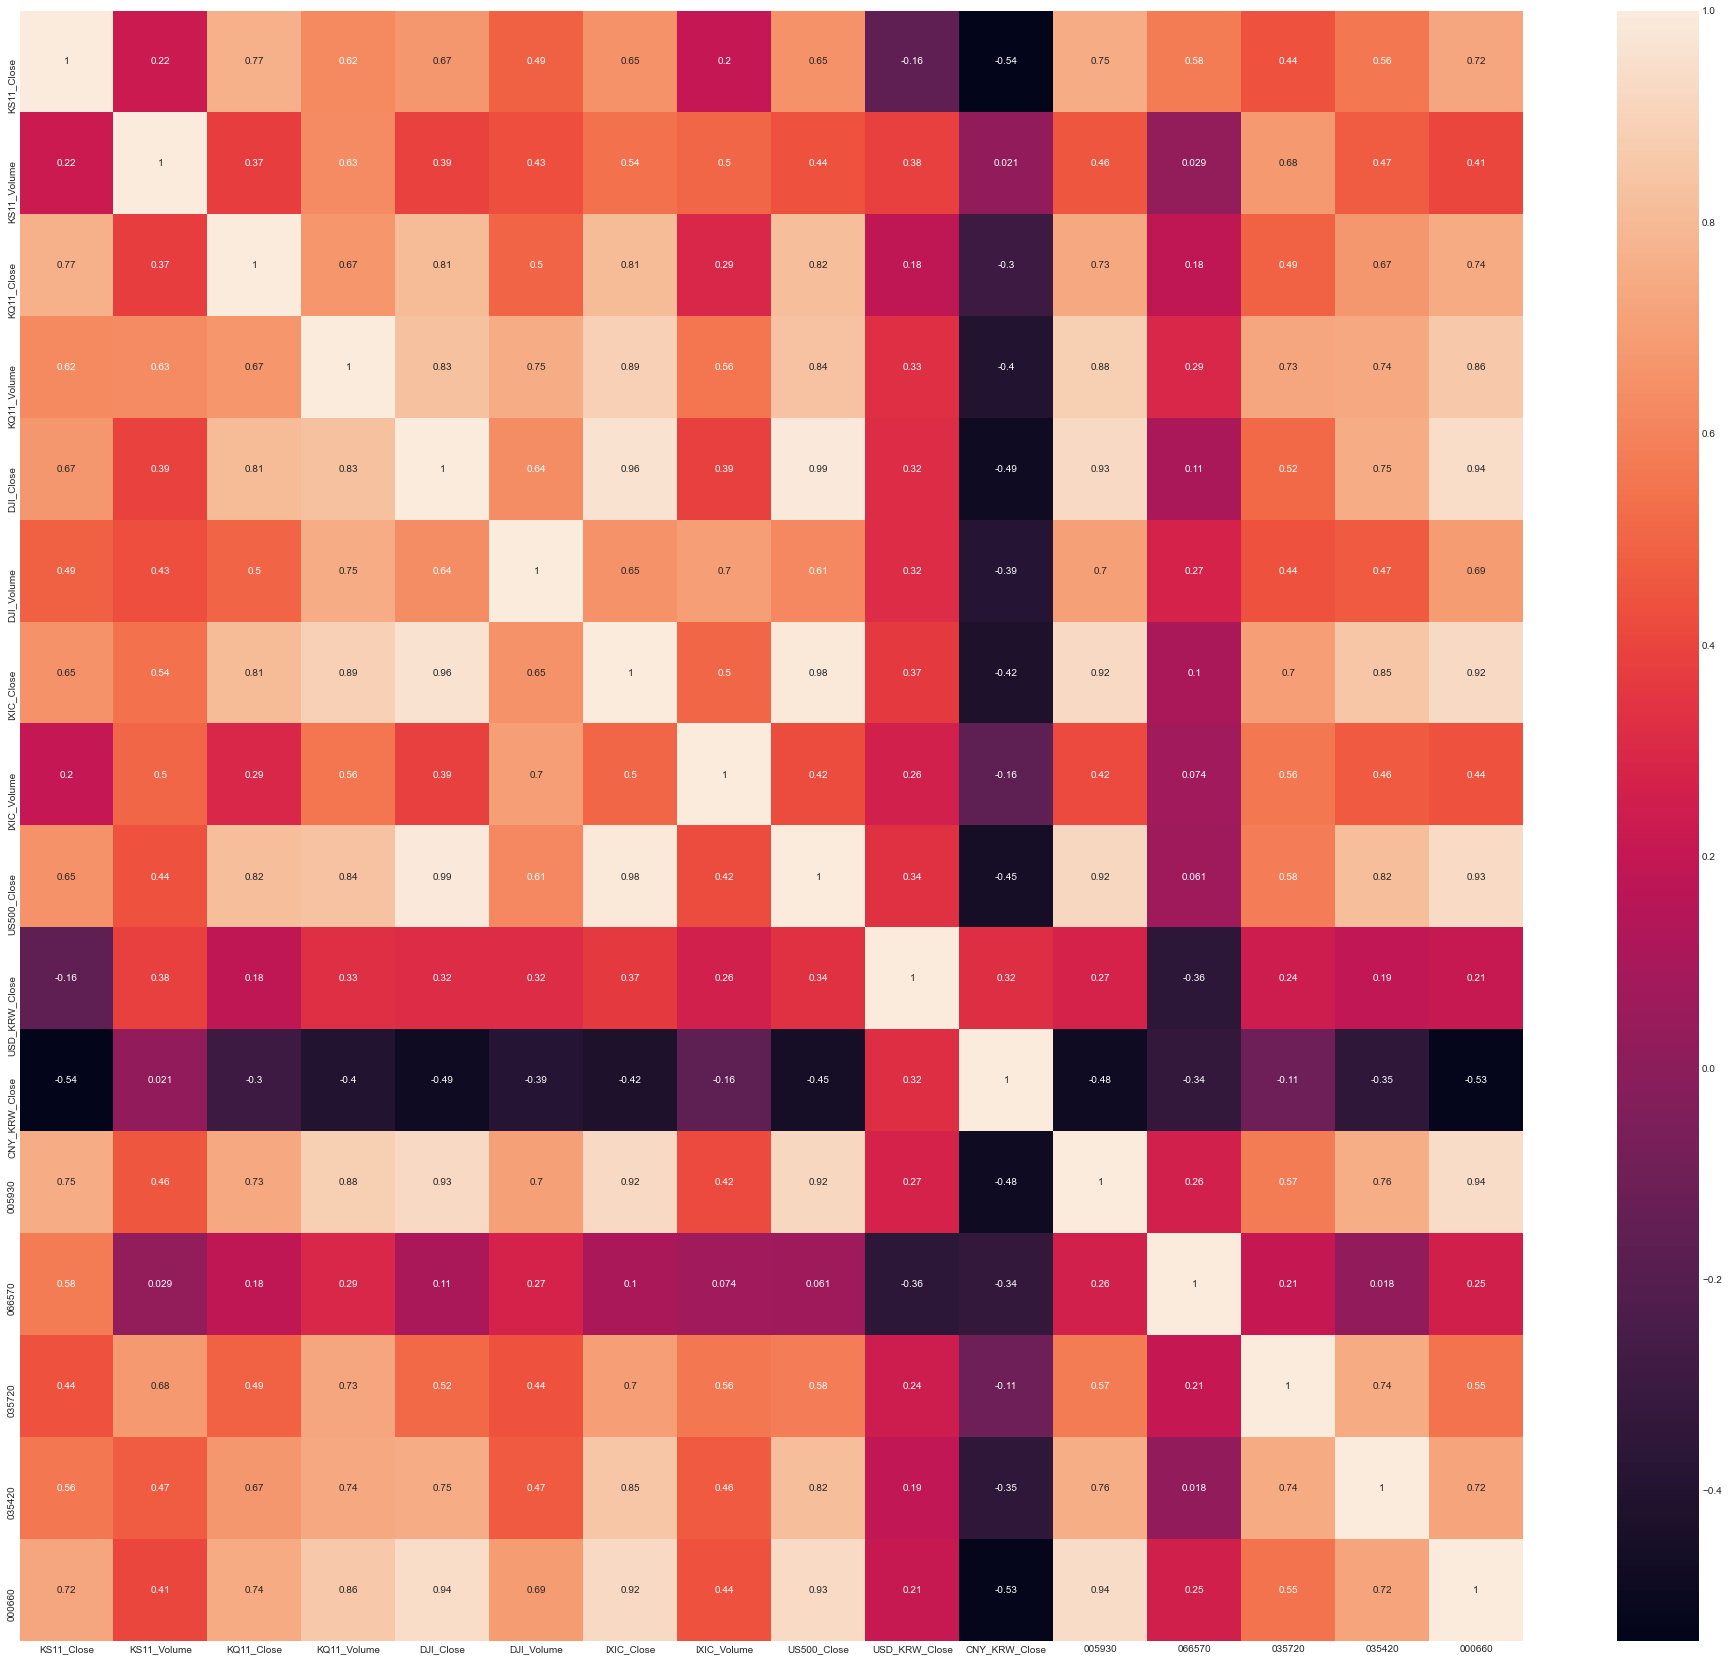

In [27]:
#3.5 상관관계 보기
def corrHeatMap(df, method='pearson') :    
    fig, ax = plt.subplots(figsize=(30,30))
    smap = sns.heatmap(df.corr(method=method), annot=True, ax=ax)
    smap.set_xticklabels(smap.get_xmajorticklabels(), fontsize=10)
    smap.set_yticklabels(smap.get_ymajorticklabels(), fontsize=10)
    return
corrHeatMap(df)

In [ ]:
df

In [28]:
#4 Y 값 넣기
for i in stockList :
    df[i+'_change_tmp'] = df[i].pct_change()
    df[i+'_change'] = df.apply(lambda x : 1 if x[i+'_change_tmp'] > 0 else 0, axis=1)
    df.drop([i+'_change_tmp'], axis=1, inplace=True)
df

,KS11_Close,KS11_Volume,KQ11_Close,KQ11_Volume,DJI_Close,DJI_Volume,IXIC_Close,IXIC_Volume,US500_Close,USD_KRW_Close,...,005930,066570,035720,035420,000660,005930_change,066570_change,035720_change,035420_change,000660_change
2011-01-04,2085.14,4.159100e+08,521.35,7.269300e+05,11691.18,178630000.0,2681.25,4.726800e+08,1270.20,1125.50,...,19160.0,115318.0,77600.0,69530.0,25600.0,0,0,0,0,0
2011-01-05,2082.55,3.860600e+08,523.81,6.404300e+05,11722.89,169990000.0,2702.20,4.668700e+08,1276.56,1123.50,...,18840.0,113364.0,78000.0,69843.0,25900.0,0,0,1,1,1
2011-01-06,2077.61,4.078300e+08,527.64,7.939000e+05,11697.31,193080000.0,2709.89,4.738500e+08,1273.85,1123.20,...,18600.0,112386.0,78200.0,69530.0,26100.0,0,0,1,0,1
2011-01-07,2086.20,3.355600e+08,530.84,6.574500e+05,11674.76,188720000.0,2703.17,4.623800e+08,1271.50,1122.20,...,18420.0,110920.0,80100.0,70628.0,26100.0,0,0,1,1,0
2011-01-10,2080.81,3.426400e+08,533.98,6.167800e+05,11637.45,150340000.0,2707.80,4.413000e+08,1269.75,1127.50,...,18340.0,112386.0,79300.0,67489.0,25300.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28,2808.60,1.010000e+09,927.00,1.640000e+09,30403.97,303080000.0,12899.42,9.783400e+08,3735.36,1095.60,...,78700.0,124500.0,373000.0,281000.0,115500.0,1,1,0,0,0
2020-12-29,2820.51,1.050000e+09,957.41,1.510000e+09,30335.67,358870000.0,12850.22,8.968100e+08,3727.04,1090.97,...,78300.0,131500.0,384500.0,283000.0,116000.0,0,1,1,1,1
2020-12-30,2873.47,1.070000e+09,968.42,1.640000e+09,30409.56,296140000.0,12870.00,9.540100e+08,3732.04,1087.62,...,81000.0,135000.0,389500.0,292500.0,118500.0,1,1,1,1,1
2021-01-04,2944.45,1.030000e+09,977.62,1.700000e+09,30223.89,476730000.0,12698.45,1.270000e+09,3700.65,1086.48,...,83000.0,142000.0,396000.0,293000.0,126000.0,1,1,1,1,1


In [29]:
#4 데이터 정규화하기 
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df), columns=df.columns, index=df.index)

#4 Y 값 넣기
for i in stockList :
    df_scaled.drop([i+'_change'], axis=1, inplace=True)
    df_scaled[i+'_change'] = df[i+'_change']
df_scaled = df_scaled[1:]
df_scaled

,KS11_Close,KS11_Volume,KQ11_Close,KQ11_Volume,DJI_Close,DJI_Volume,IXIC_Close,IXIC_Volume,US500_Close,USD_KRW_Close,...,005930,066570,035720,035420,000660,005930_change,066570_change,035720_change,035420_change,000660_change
2011-01-05,0.003508,-0.246139,-0.938225,-0.676016,-1.408254,-0.304848,-1.197138,-0.280217,-1.402576,-0.036983,...,-1.239168,2.620372,-0.797853,-1.236134,-1.024809,0,0,1,1,1
2011-01-06,-0.021967,-0.143171,-0.905208,-0.675745,-1.413056,-0.137106,-1.193883,-0.247753,-1.406829,-0.043251,...,-1.257635,2.558792,-0.794638,-1.241997,-1.016501,0,0,1,0,1
2011-01-07,0.022330,-0.484996,-0.877622,-0.675986,-1.417289,-0.168780,-1.196727,-0.301099,-1.410518,-0.064144,...,-1.271485,2.466486,-0.764095,-1.221427,-1.016501,0,0,1,1,0
2011-01-10,-0.005465,-0.451509,-0.850553,-0.676058,-1.424293,-0.447600,-1.194768,-0.399141,-1.413265,0.046590,...,-1.277641,2.558792,-0.776955,-1.280235,-1.049730,0,1,0,0,0
2011-01-11,0.033262,-0.128414,-0.853225,-0.675840,-1.417830,-0.396020,-1.190946,-0.488393,-1.405840,0.015250,...,-1.283796,2.528065,-0.749627,-1.300805,-1.045576,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28,3.747568,2.704998,2.537538,2.217870,2.098475,0.662013,3.118996,2.098598,2.456776,-0.619908,...,3.366800,3.321546,3.944382,2.719791,2.696794,1,1,0,0,0
2020-12-29,3.808985,2.894191,2.799693,1.988387,2.085654,1.067312,3.098172,1.719407,2.443717,-0.716644,...,3.336022,3.762298,4.129249,2.757260,2.717562,0,1,1,1,1
2020-12-30,4.082086,2.988788,2.894606,2.217870,2.099524,0.611596,3.106544,1.985441,2.451565,-0.786637,...,3.543775,3.982674,4.209625,2.935238,2.821401,1,1,1,1,1
2021-01-04,4.448112,2.799594,2.973916,2.323786,2.064671,1.923532,3.033933,3.455090,2.402295,-0.810455,...,3.697666,4.423427,4.314115,2.944605,3.132919,1,1,1,1,1


In [30]:
#4 test, train 나누기
train_set = df_scaled[:'2018-01-01'].values
#test_set = df_scaled['2018-01-01':].values

print(df_scaled.shape)
print(train_set.shape)
#print(test_set.shape)

(2463, 21)
(1723, 21)


In [31]:
y_columns = []
x_columns = df_scaled.columns.tolist()
for i in stockList :
    y_columns.append(i+'_change')
    x_columns.remove(i+'_change')

In [32]:
# 60일치 데이터로 예측
time_seq = 60
X_train = []
y_train = []
for i in range(time_seq, train_set.shape[0]):
    X_train.append(train_set[i-60:i, 0:train_set.shape[1]-len(stockList)])
    y_train.append(train_set[i, train_set.shape[1]-len(stockList):])
X_train, y_train = np.array(X_train), np.array(y_train)

In [33]:
print(X_train.shape)
print(y_train.shape)

(1663, 60, 16)
(1663, 5)


In [ ]:
#6 머신러닝에 적용하기

In [54]:
#7 딥러닝에 적용하기

# LSTM 모델 만들기
model = Sequential()
# LSTM 레이어를 쌓아올릴 때는 return_sequences 를 True로 설정한다
# LSTM 을 사용하기 위해서는 3차원 데이터가 필요(batch_size, timesteps, input_dim)

model = Sequential()
model.add(LSTM(30, activation='relu', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(5, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=30, epochs=10)

Epoch 1/10
56/56 [==============================] - 1s 19ms/step - loss: 0.7064 - accuracy: 0.0920
Epoch 2/10
56/56 [==============================] - 1s 18ms/step - loss: 0.6931 - accuracy: 0.2183
Epoch 3/10
56/56 [==============================] - 1s 16ms/step - loss: 0.6916 - accuracy: 0.3692
Epoch 4/10
56/56 [==============================] - 1s 15ms/step - loss: 0.6907 - accuracy: 0.3157
Epoch 5/10
56/56 [==============================] - 1s 15ms/step - loss: 0.6899 - accuracy: 0.3530
Epoch 6/10
56/56 [==============================] - 1s 16ms/step - loss: 0.6892 - accuracy: 0.3620
Epoch 7/10
56/56 [==============================] - 1s 17ms/step - loss: 0.6889 - accuracy: 0.3145
Epoch 8/10
56/56 [==============================] - 1s 15ms/step - loss: 0.6883 - accuracy: 0.3494
Epoch 9/10
56/56 [==============================] - 1s 16ms/step - loss: 0.6878 - accuracy: 0.3524
Epoch 10/10
56/56 [==============================] - 1s 17ms/step - loss: 0.6873 - accuracy: 0.2892


In [57]:
# 60일치 데이터로 예측
X_test = []
y_test = []
for i in range(train_set.shape[0], df_scaled.shape[0]):
    X_test.append(df_scaled.values[i-60:i, 0:train_set.shape[1]-len(stockList)])
    y_test.append(df_scaled.values[i, train_set.shape[1]-len(stockList):])
X_test, y_test = np.array(X_test), np.array(y_test)

predictions = model.predict(X_test)
#for i in range(0, len(stockList)) :
#    accuracy_score(y_test[:,i], predictions[:,i])

In [58]:
# 0.5 기준으로 0, 1 분류
def tmp(x) :
    if x > 0.5 :
        return 1
    else :
        return 0
pred_bin = np.vectorize(tmp)

pred = pred_bin(predictions)
pred

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [59]:
def get_confusion_matrix(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    print('confusion matrix')
    print('accuracy:{0:.4f},precision:{1:.4f},recall:{2:.4f},F1:{3:.4f},ROC AUC score:{4:.4f}'.format(accuracy, precision, recall, f1,roc_score))
    return
for i in range(0, len(stockList)) :
    get_confusion_matrix(y_test[:, i], pred[:, i])

confusion matrix
accuracy:0.5027,precision:0.5072,recall:0.5642,F1:0.5342,ROC AUC score:0.5020
confusion matrix
accuracy:0.5000,precision:0.4802,recall:0.7278,F1:0.5786,ROC AUC score:0.5122
confusion matrix
accuracy:0.5459,precision:0.5630,recall:0.2153,F1:0.3115,ROC AUC score:0.5314
confusion matrix
accuracy:0.5014,precision:0.4715,recall:0.5000,F1:0.4854,ROC AUC score:0.5013
confusion matrix
accuracy:0.5041,precision:0.5049,recall:0.4189,F1:0.4579,ROC AUC score:0.5041


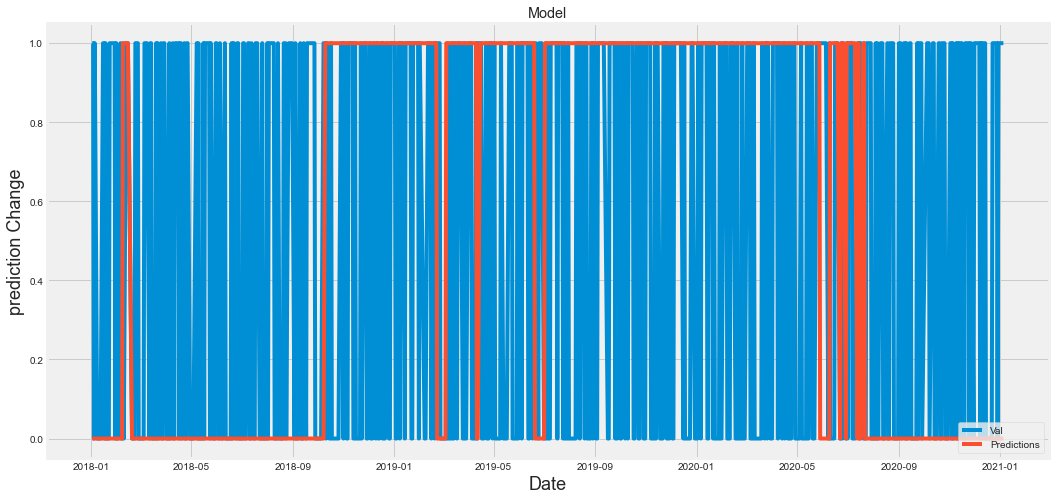

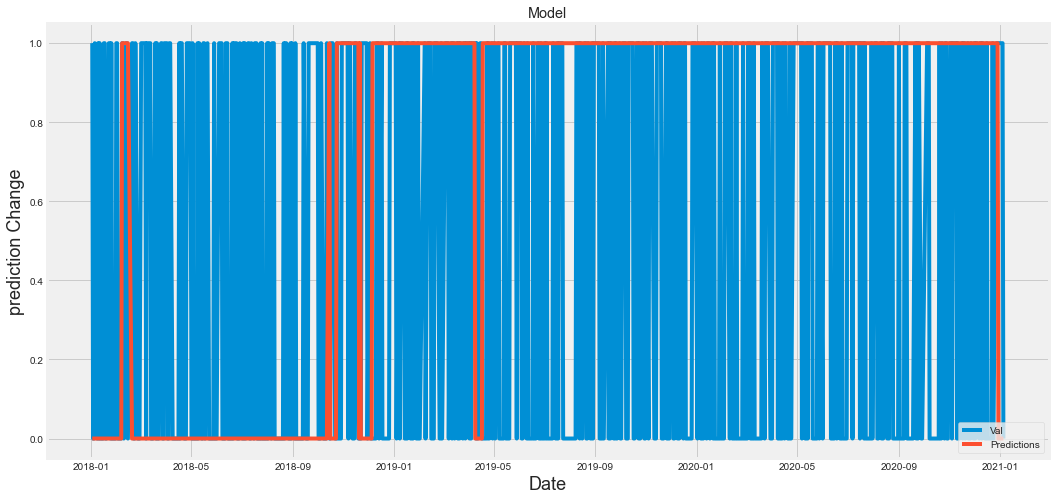

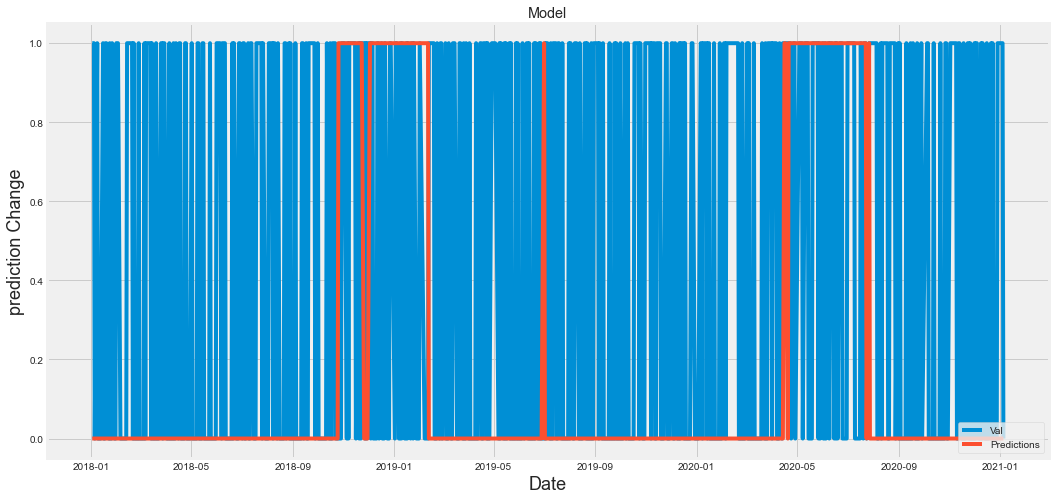

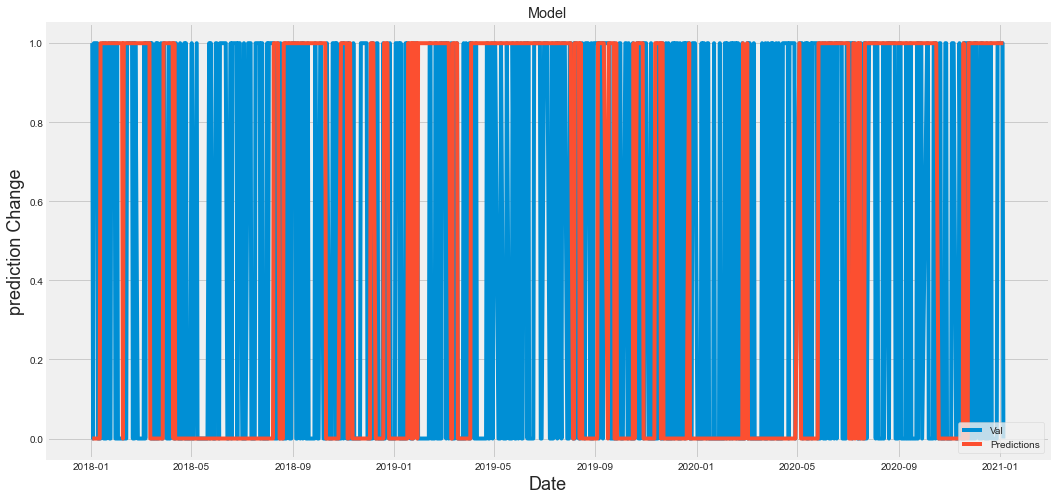

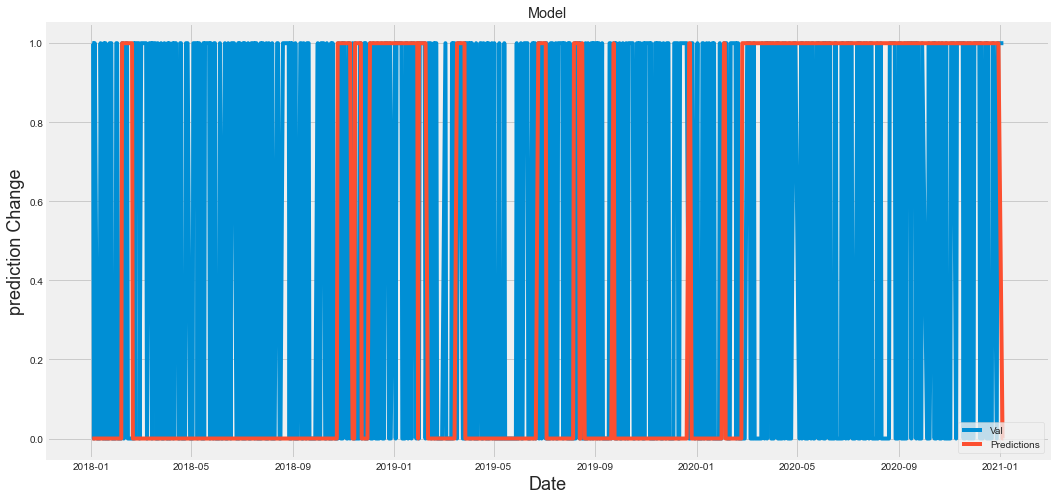

In [60]:
# 그래프로 확인
for i in range(0, len(stockList)) :
    train = df_scaled[:'2018-01-01']
    valid = df_scaled['2018-01-01':]
    valid['Predictions'] = pred[:,i]

    plt.figure(figsize=(16, 8))
    plt.title('Model')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('prediction Change', fontsize=18)
    #plt.plot(train[stockList[i] +'_change'])
    plt.plot(valid[[stockList[i] +'_change', 'Predictions']])
    plt.legend(['Val', 'Predictions'], loc='lower right')
    plt.show()